In [10]:
import numpy as np
import pandas as pd
import numpy.random as npr
import QuantLib as ql
import matplotlib.pyplot as plt

### 1a) Compute the accrued interest.

In [11]:
#Variables
notionalAmount = 25000
coupon = 0.0675
coupon_freq = 2
issueDate = ql.Date(31,7,2020)
maturityDate = ql.Date(21,7,2025)
settlementDate = ql.Date(19,9,2020)
firstCouponDate = ql.Date(29,1, 2021) #ISTO ESTA CORRETO????
inflationIssue = 237.14365
inflationSettlement = 251.14721
b0, b1, b2, b3, tau1, tau2 = 0.059, -0.016, -0.005, 0.01, 5, 0.5

In [12]:
# Calculate Accrued Interest
u = ql.ActualActual().dayCount(issueDate, settlementDate)
w = ql.ActualActual().dayCount(issueDate, firstCouponDate)
ai = notionalAmount * (coupon/coupon_freq) * (u/w)
print("Accured Interest: {} ".format(ai))

Accured Interest: 231.79945054945057 


In [13]:
#ALGUEM ME EXPLICA PORQUE TEMOS DE FAZER ESTE CALCULO??

inflationVar = (inflationSettlement / inflationIssue)
print("Inflation Variation: {} ".format(inflationVar))
notional_updated = notionalAmount * (1 + inflationVar)
ai_inflation = notional_updated * (coupon/coupon_freq) * (u/w)
print("Accured Interest Inflation: {} ".format(ai_inflation))

Inflation Variation: 1.0590509591970942 
Accured Interest Inflation: 477.2868809952056 


### b) Simulate 1000 scenarios for the inflation rate curve and CPI index

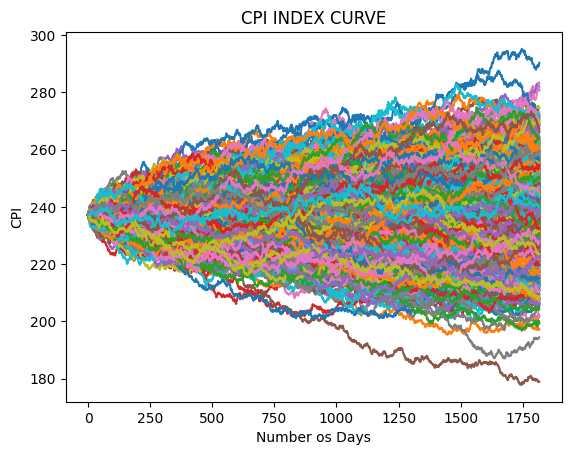

In [75]:
#CPI SIMULATION
npr.seed(2)
paths = 1000
miu = 0.05321
sigma = 0.06358
dt = 1. / totalNumberDays
S = np.zeros((totalNumberDays+1, paths))
S[0,:] = inflationIssue
S[1:,:] = S[0,:] * np.exp((miu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.cumsum(npr.randn(totalNumberDays, paths),0))
plt.plot(S)
plt.title("CPI INDEX CURVE")
plt.xlabel("Number os Days")
plt.ylabel("CPI") 
# o eixo do Y e em qu medida? pontos ou %
plt.show()
